# FRA Milestone 1

### Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn
import sklearn
color = sns.color_palette()
import sklearn.metrics as mertics
import scipy.stats as stats
import sklearn.metrics as metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\Sharjil Shah'

##### Importing the dataset

In [38]:
df = pd.read_excel('Company_Data2015-1.xlsx')

In [39]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [181]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-',("_")).str.replace('%','perc')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets/Liabilities_     

In [43]:
df.dtypes.value_counts()

float64    63
int64       3
object      1
dtype: int64

Let us check the number of rows (observations) and the number of columns (variables)


In [44]:
print('The number of rows (observations) is =',df.shape[0],'\n''The number of columns (variables) is =',df.shape[1])

The number of rows (observations) is = 3586 
The number of columns (variables) is = 67


Let us check the basic measures of descriptive statistics for the continuous variables

In [46]:
pd.options.display.float_format = '{:.2f}'.format 
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.00,603.89,10636.76,0.00,8.00,49.00,106.00,514721.00
Creditors_Velocity_Days,3586.00,2057.85,54169.48,0.00,8.00,39.00,89.00,2034145.00
Inventory_Velocity_Days,3483.00,79.64,137.85,-199.00,0.00,35.00,96.00,996.00
Value_of_Output/Total_Assets,3586.00,0.82,1.20,-0.33,0.07,0.48,1.16,17.63


In [47]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block


##### Q 1.1 Outlier Treatment

In [48]:
df1 = df.drop(['Co_Code', 'Co_Name'], axis = 1)

In [49]:
df1.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


In [50]:
df1.shape

(3586, 65)

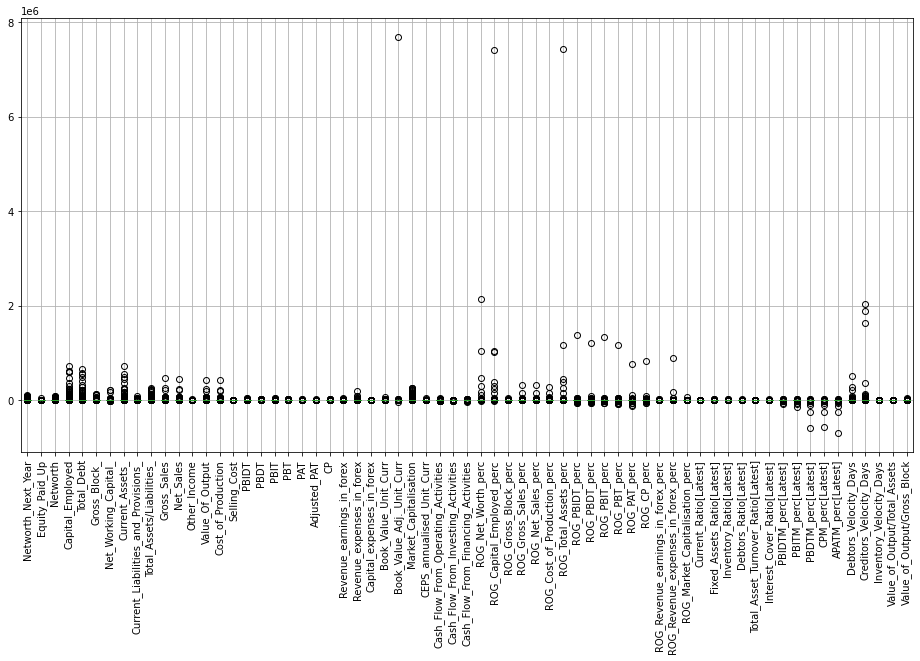

In [51]:
# Checking Outliers in dataset
df1.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

### Outlier treatment :

In [52]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature

In [53]:
def mod_outlier(df1):
    df1 = df1._get_numeric_data()
    
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr )
    upper_bound    = q3 + (1.5 * iqr)
 
    for col in df1.columns:
        for i in range(0,len(df1[col])):
            if df1[col][i] < lower_bound[col]:
                df1[col][i] = lower_bound[col]
            
            if df1[col][i] > upper_bound[col]: 
                    df1[col][i] = upper_bound[col]
    for col in df1.columns:
        return(df1)

In [54]:
df_new= mod_outlier(df1)

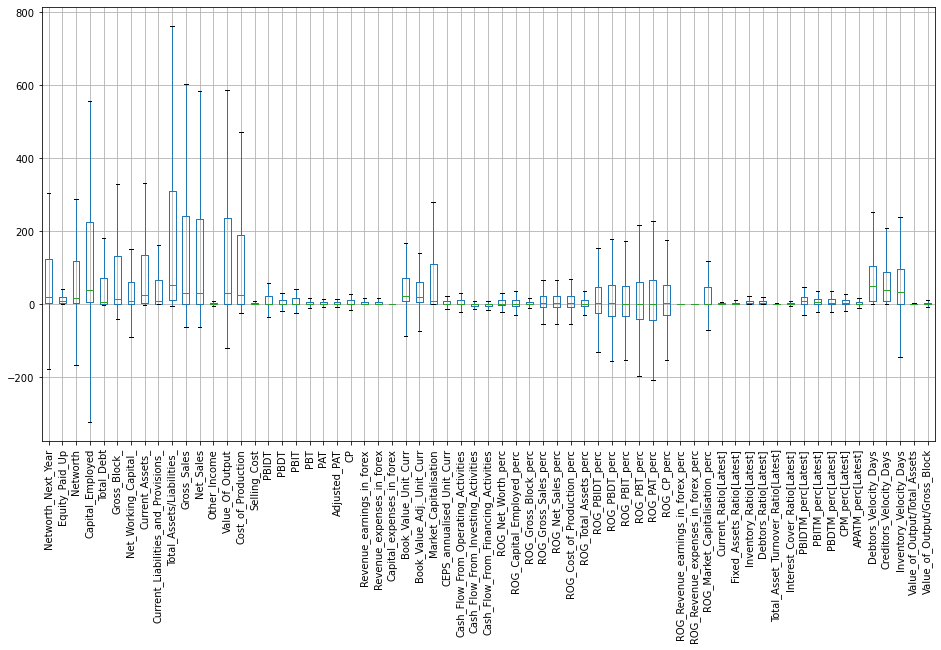

In [55]:
# Checking Outliers in dataset
df_new.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

##### Q 1.2 Missing Value Treatment

Lets check for missing values in the dataset

In [56]:
#check isnull present
df_new.isnull().sum().sort_values(ascending=False).head(13)

Inventory_Velocity_Days               103
Book_Value_Adj._Unit_Curr               4
Current_Ratio[Latest]                   1
PBITM_perc[Latest]                      1
Fixed_Assets_Ratio[Latest]              1
Inventory_Ratio[Latest]                 1
Debtors_Ratio[Latest]                   1
Total_Asset_Turnover_Ratio[Latest]      1
PBIDTM_perc[Latest]                     1
Interest_Cover_Ratio[Latest]            1
PBDTM_perc[Latest]                      1
CPM_perc[Latest]                        1
APATM_perc[Latest]                      1
dtype: int64

In [57]:
df_new.isnull().sum().sum()

118

In [58]:
df_new.size

233090

There are 0.05% missing values in the dataset

In [59]:
#Columns with missing values
print(np.where(df_new.isnull().sum()>0))

(array([27, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62], dtype=int64),)


#### Treating Missing value


In [61]:
df_new.fillna(df.median())

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-21.43,-21.16,-17.09,-11.12,29,101,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,-17.09,-11.12,97,210,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-21.16,-17.09,-11.12,93,63,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,28.48,18.52,253,210,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,303.53,43.17,287.41,555.11,180.83,328.88,0.00,332.19,163.03,760.52,...,0.00,0.00,0.00,0.00,0.00,0,0,35.00,0.60,7.76
3582,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,39.92,32.17,29.81,28.48,18.52,13,53,77.00,0.29,1.00
3583,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [62]:
df_new.isnull().any().any()

True

Let's visually inspect the missing values in our data

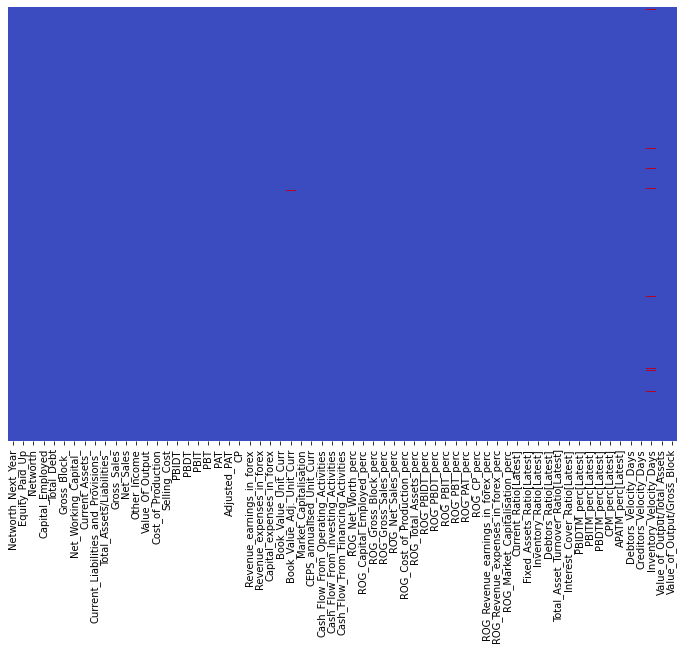

In [64]:
plt.figure(figsize = (12,8))
sns.heatmap(df_new.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [65]:
cat=[]
num=[]
for i in df_new.columns:
    if df_new[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

[]
['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_', 'Current_Liabilities_and_Provisions_', 'Total_Assets/Liabilities_', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_per

In [66]:
##Lets treat these missing values with median (replacement with median eliminates impact of
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_new = pd.DataFrame(imputer.fit_transform(df_new))
df_new.columns=num
#df_new =df_fra[cat]
df_new.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-21.43,-21.16,-17.09,-11.12,29.00,101.00,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,-17.09,-11.12,97.00,210.00,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-21.16,-17.09,-11.12,93.00,63.00,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,28.48,18.52,253.00,210.00,0.00,0.01,0.05


In [67]:
df_new.isnull().any().any()

False

In [68]:
df_new.isnull().sum().sort_values(ascending=False).head(20)

Networth_Next_Year                    0
ROG_Net_Worth_perc                    0
ROG_Gross_Block_perc                  0
ROG_Gross_Sales_perc                  0
ROG_Net_Sales_perc                    0
ROG_Cost_of_Production_perc           0
ROG_Total_Assets_perc                 0
ROG_PBIDT_perc                        0
ROG_PBDT_perc                         0
ROG_PBIT_perc                         0
ROG_PBT_perc                          0
ROG_PAT_perc                          0
ROG_CP_perc                           0
ROG_Revenue_earnings_in_forex_perc    0
ROG_Revenue_expenses_in_forex_perc    0
ROG_Market_Capitalisation_perc        0
Current_Ratio[Latest]                 0
Fixed_Assets_Ratio[Latest]            0
Inventory_Ratio[Latest]               0
Debtors_Ratio[Latest]                 0
dtype: int64

##### Q 1.3 Transform Target variable into 0 and 1 ( Creating a binary target variable using 'Networth_Next_Year')

In [69]:
df_new['default'] = np.where((df_new['Networth_Next_Year'] > 0), 0, 1)

In [71]:
#### Checking top 5 rows


In [72]:
df_new[['default','Networth_Next_Year']].head(5)

,default,Networth_Next_Year
0,1,-175.74
1,1,-175.74
2,1,-175.74
3,1,-175.74
4,1,-175.74


In [73]:
df_new[['default','Networth_Next_Year']].tail(5)

,default,Networth_Next_Year
3581,0,303.53
3582,0,303.53
3583,0,303.53
3584,0,303.53
3585,0,303.53


In [74]:
df_new['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

Checking percentage of default

In [77]:
df_new['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

##### Q 1.4 Univariate & Bivariate analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

Univariate analysis :

In [78]:
pd.options.display.float_format = '{:.2f}'.format 
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,3586.00,77.40,120.48,-175.74,3.98,19.02,123.80,303.53
Equity_Paid_Up,3586.00,13.99,14.00,0.00,3.75,8.29,19.52,43.17
Networth,3586.00,73.69,112.94,-166.22,3.89,18.58,117.30,287.41
Capital_Employed,3586.00,152.49,207.87,-320.90,7.60,39.09,226.60,555.11
Total_Debt,3586.00,47.44,68.22,-0.72,0.03,7.49,72.35,180.83
...,...,...,...,...,...,...,...,...
Creditors_Velocity_Days,3586.00,62.39,68.03,0.00,8.00,39.00,89.00,210.00
Inventory_Velocity_Days,3586.00,61.22,73.20,-144.00,0.00,35.00,93.00,240.00
Value_of_Output/Total_Assets,3586.00,0.73,0.77,-0.33,0.07,0.48,1.16,2.79
Value_of_Output/Gross_Block,3586.00,3.36,4.10,-6.69,0.27,1.53,4.91,11.87


Important Feature Box Plot

Text(0.5, 1.0, 'Figure:Boxplot of few important features')

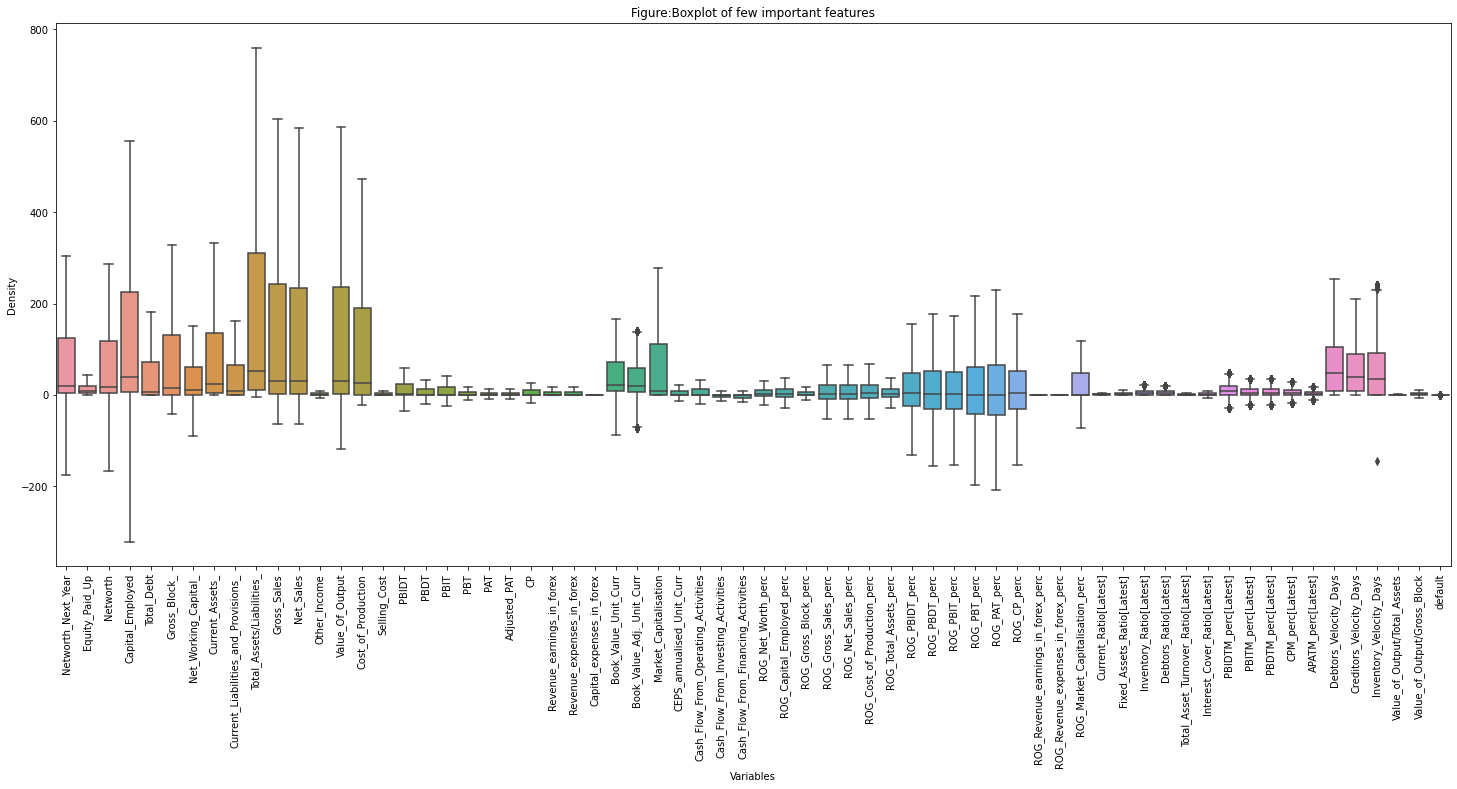

In [81]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df_new)
plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Density")
plt.title('Figure:Boxplot of few important features')

Variable '_Total_Asset_To_Liabilities_' still have some extreme values.

'_Capital_Employes_' still have some Extreme and Lower values.


#### Distribution of column with Displot & Box plot:

<AxesSubplot:xlabel='ROG_Capital_Employed_perc'>

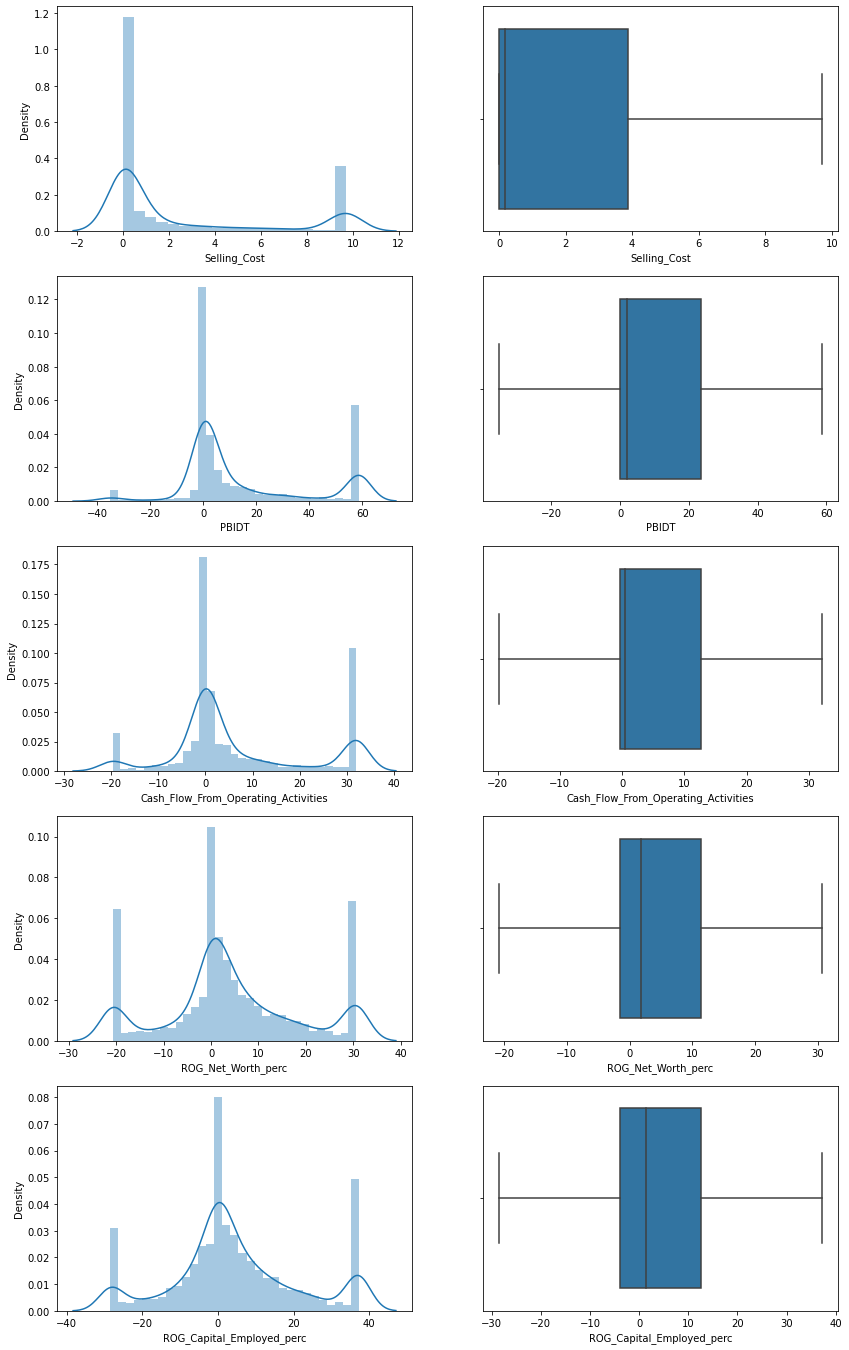

In [83]:
fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(14,24)

sns.distplot(df_new['Selling_Cost'], ax= axes[0][0])
sns.boxplot(df_new['Selling_Cost'],orient = 'H', ax= axes[0][1])
sns.distplot(df_new['PBIDT'], ax= axes[1][0])
sns.boxplot(df_new['PBIDT'],orient = 'H', ax= axes[1][1])
sns.distplot(df_new['Cash_Flow_From_Operating_Activities'], ax= axes[2][0])
sns.boxplot(df_new['Cash_Flow_From_Operating_Activities'],orient = 'H', ax= axes[2][1])
sns.distplot(df_new['ROG_Net_Worth_perc'], ax= axes[3][0])
sns.boxplot(df_new['ROG_Net_Worth_perc'],orient = 'H', ax= axes[3][1])
sns.distplot(df_new['ROG_Capital_Employed_perc'], ax= axes[4][0])
sns.boxplot(df_new['ROG_Capital_Employed_perc'],orient = 'H', ax= axes[4][1])

<AxesSubplot:xlabel='Current_Ratio[Latest]'>

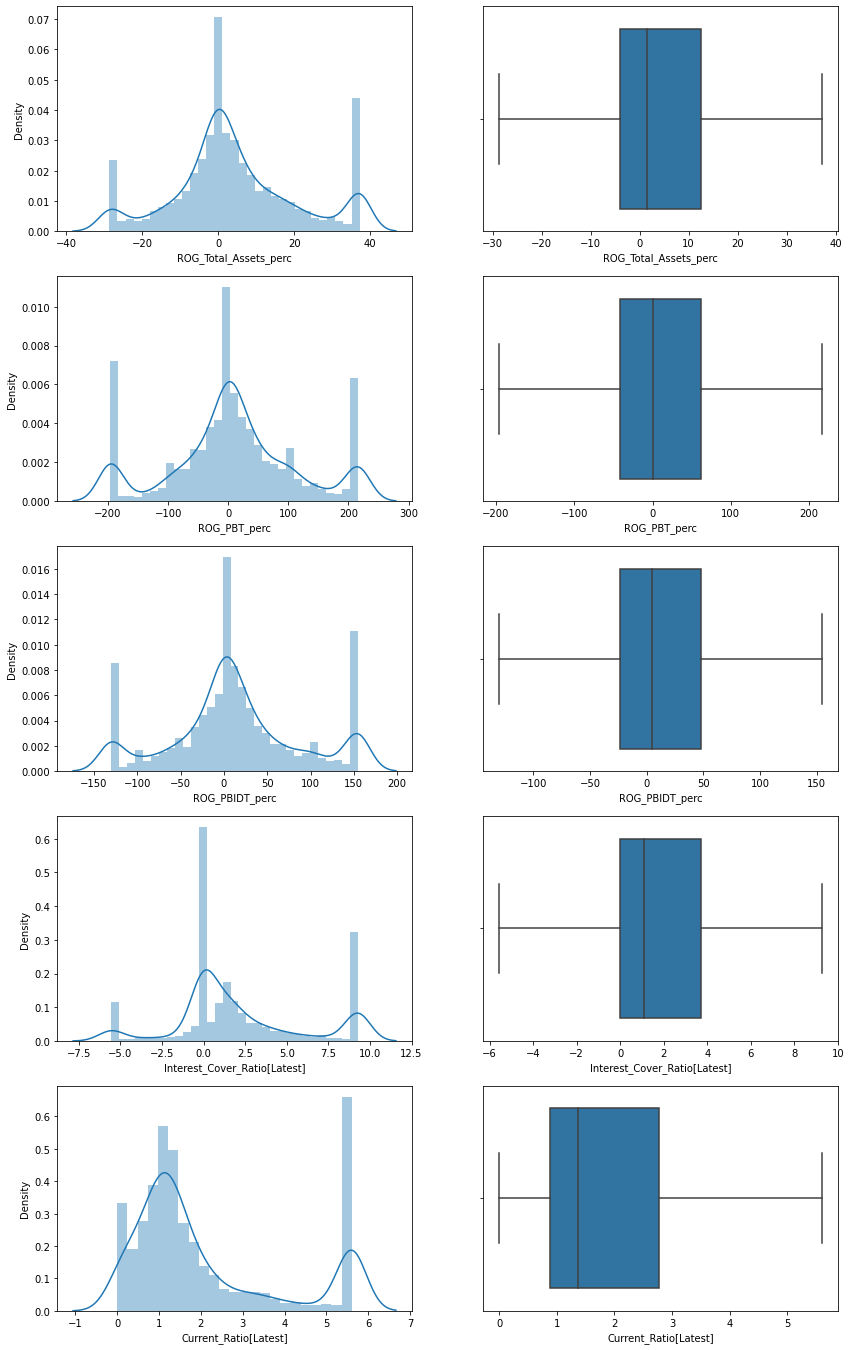

In [85]:
fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(14,24)
sns.distplot(df_new['ROG_Total_Assets_perc'], ax= axes[0][0])
sns.boxplot(df_new['ROG_Total_Assets_perc'],orient = 'H', ax= axes[0][1])
sns.distplot(df_new['ROG_PBT_perc'], ax= axes[1][0])
sns.boxplot(df_new['ROG_PBT_perc'],orient = 'H', ax= axes[1][1])
sns.distplot(df_new['ROG_PBIDT_perc'], ax= axes[2][0])
sns.boxplot(df_new['ROG_PBIDT_perc'],orient = 'H', ax= axes[2][1])
sns.distplot(df_new['Interest_Cover_Ratio[Latest]'], ax= axes[3][0])
sns.boxplot(df_new['Interest_Cover_Ratio[Latest]'],orient = 'H', ax= axes[3][1])
sns.distplot(df_new['Current_Ratio[Latest]'], ax= axes[4][0])
sns.boxplot(df_new['Current_Ratio[Latest]'],orient = 'H', ax= axes[4][1])

<AxesSubplot:xlabel='Book_Value_Adj._Unit_Curr'>

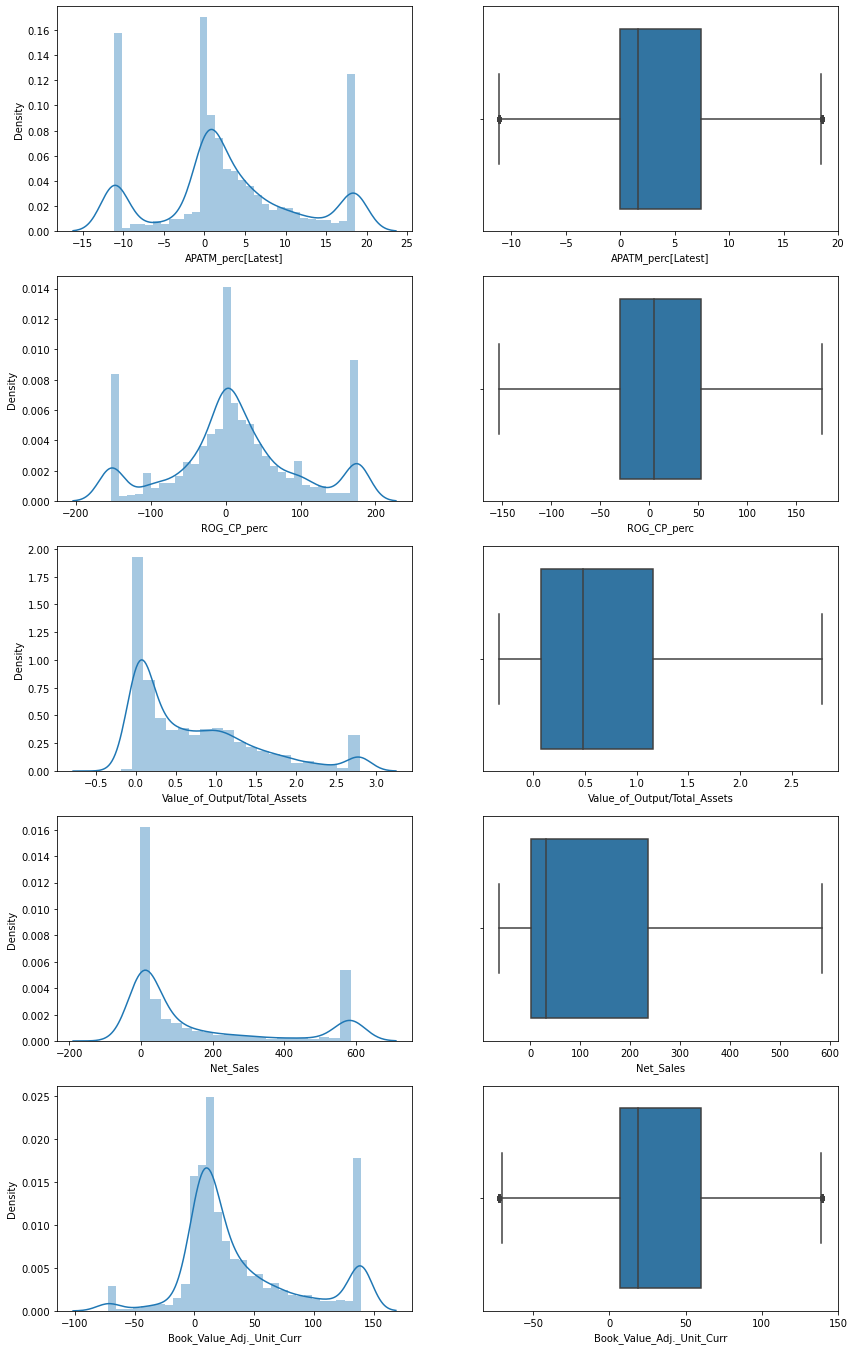

In [87]:
fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(14,24)
sns.distplot(df_new['APATM_perc[Latest]'], ax= axes[0][0])
sns.boxplot(df_new['APATM_perc[Latest]'],orient = 'H', ax= axes[0][1])
sns.distplot(df_new['ROG_CP_perc'], ax= axes[1][0])
sns.boxplot(df_new['ROG_CP_perc'],orient = 'H', ax= axes[1][1])
sns.distplot(df_new['Value_of_Output/Total_Assets'], ax= axes[2][0])
sns.boxplot(df_new['Value_of_Output/Total_Assets'],orient = 'H', ax= axes[2][1])
sns.distplot(df_new['Net_Sales'], ax= axes[3][0])
sns.boxplot(df_new['Net_Sales'],orient = 'H', ax= axes[3][1])
sns.distplot(df_new['Book_Value_Adj._Unit_Curr'], ax= axes[4][0])
sns.boxplot(df_new['Book_Value_Adj._Unit_Curr'],orient = 'H', ax= axes[4][1])

Text(0.5, 1.0, 'Figure: Countplot of Target Variable Default')

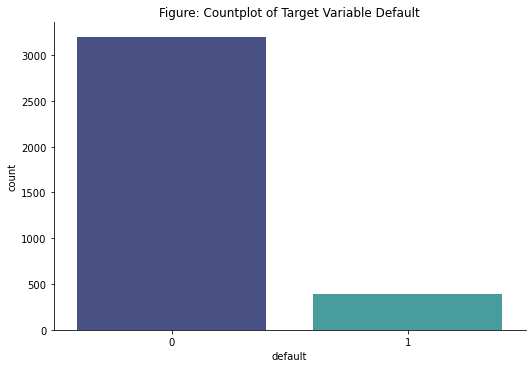

In [88]:
sns.catplot('default', data=df_new, kind='count',aspect=1.5, palette='mako')
plt.title("Figure: Countplot of Target Variable Default")

#### Bivariate Analysis

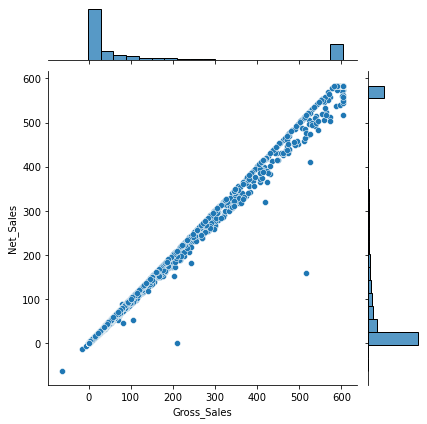

In [89]:
sns.jointplot(x = df_new['Gross_Sales'],
y = df_new['Net_Sales'])

There exists linear relationship between these two important variables

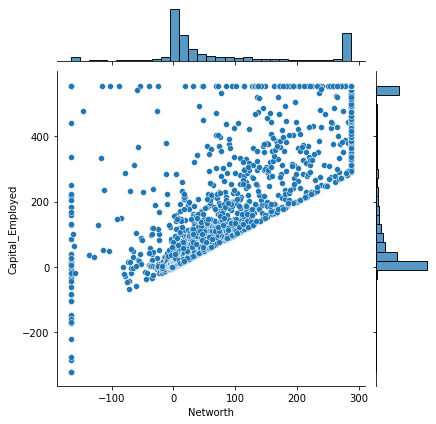

In [90]:
sns.jointplot(x = df_new['Networth'],
y = df1['Capital_Employed'])

As the capital increases, net worth also increases, but in some cases, capital seems to be disbursed even for lesser networth.

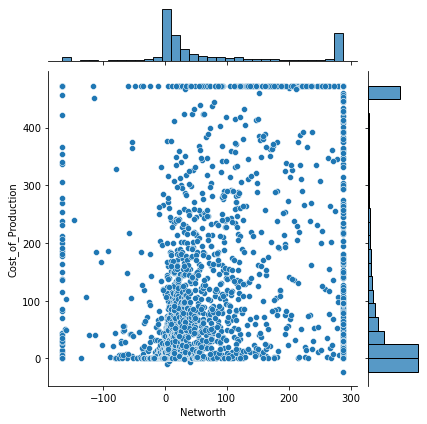

In [91]:
sns.jointplot(x = df_new['Networth'],
y = df1['Cost_of_Production'])

There exists no such relationship between networth and cost_of_production variables.

<AxesSubplot:xlabel='default', ylabel='ROG_Net_Worth_perc'>

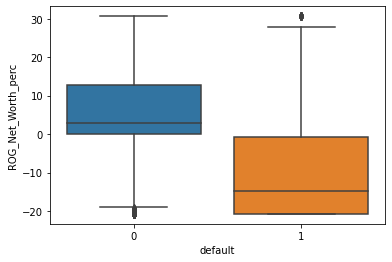

In [93]:
sns.boxplot(x = df_new['default'],
y = df1['ROG_Net_Worth_perc'])

In [95]:
# As per Regression Feature Elimination(RFE) we got Top important Variables and 1 Target Va
df_imp =pd.DataFrame(df_new,columns=['Net_Sales','Value_Of_Output', 'PBIDT', 'PBDT', 'PBIT', 'Revenue_earnings_in_forex','Revenue_expenses_in_forex','Book_Value_Unit_Curr', 'ROG-Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Total_Assets_perc', 'Current_Ratio[Latest]', 'Fixed_Assets_Ratio[Latest]','Inventory_Ratio[Latest]', 'Total_Asset_Turnover_Ratio[Latest]', 'Interest_Cover_Ratio[Late]','APATM_perc[Latest]','Value_of_Output/Total_Assets','Value_of_Output_to_Gross_Block', 'default'])

<AxesSubplot:>

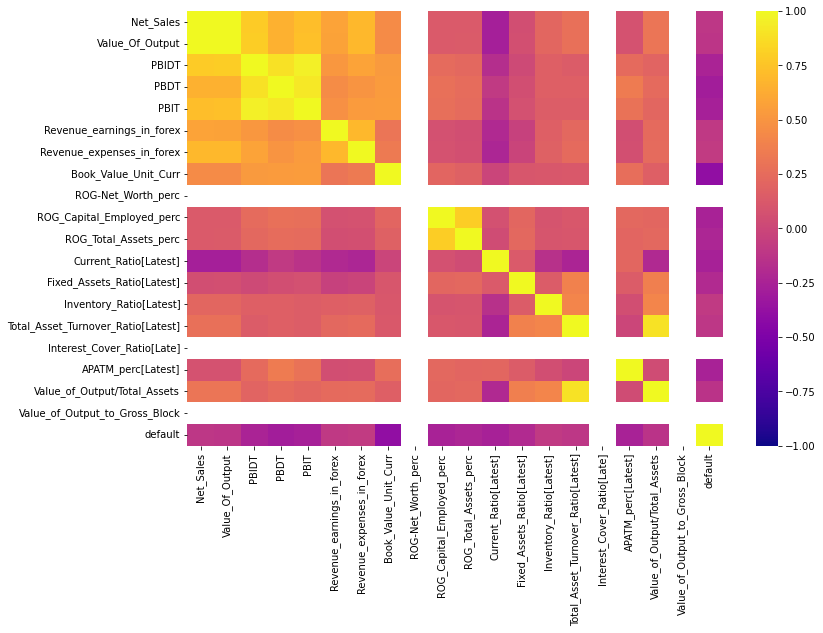

In [99]:
plt.figure(figsize = (12,8))
cor_matrix = df_imp.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

##### Q 1.5 Split the data into Train and Test dataset in a ratio of 67:33

Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42.

Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.

In [100]:
X = df_new.drop(['default','Networth_Next_Year'], axis=1)
y = df_new['default']

In [101]:
X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,Gross_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,603.46,...,-10.30,-21.43,-21.16,-17.09,-11.12,29.00,101.00,2.00,0.31,0.24
2,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,392.13,...,-28.48,-21.43,-21.16,-17.09,-11.12,97.00,210.00,0.00,-0.03,-0.26
3,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,603.46,...,-3.33,-7.21,-21.16,-17.09,-11.12,93.00,63.00,2.00,0.24,1.90
4,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,38.72,...,-28.48,-21.43,-21.16,28.48,18.52,253.00,210.00,0.00,0.01,0.05


In [103]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: default, dtype: int32

In [125]:
#Split X and y into training and test set in 67:33 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y) 
#Please note, because this data is highly imbalanced and could possibly result into different proportions in the y variable between train and test set.

In [126]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computat
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [127]:
X_train_scaled.shape

(2402, 64)

In [128]:
X_train.shape

(2402, 64)

In [129]:
X_train.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,Gross_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
842,3.25,3.49,3.54,0.05,1.53,2.94,2.98,0.05,3.59,0.42,...,40.00,30.00,35.27,28.48,18.52,0.00,0.00,0.00,0.11,0.26
1057,4.75,5.29,5.39,0.02,0.75,3.56,3.62,0.06,5.45,1.88,...,-1.12,-6.16,-2.61,-2.61,-7.65,8.00,13.00,7.00,0.90,4.12
1595,13.06,13.50,13.50,0.00,0.00,13.47,13.62,0.15,13.65,0.12,...,1.60,1.60,1.60,1.06,1.06,253.00,0.00,240.00,0.46,0.00
100,43.17,-60.79,-58.30,2.46,18.66,-84.10,7.69,91.79,33.49,0.76,...,-28.48,-21.43,-21.16,-17.09,-11.12,253.00,15.00,69.00,0.02,0.06
1191,4.00,5.95,20.62,14.33,7.76,7.38,22.22,14.83,35.45,142.80,...,4.29,3.99,3.12,2.10,1.79,53.00,28.00,0.00,2.79,11.87


In [130]:
X_test.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,Gross_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
251,2.19,-5.58,-1.55,4.03,1.07,-2.18,2.22,4.40,2.85,0.69,...,0.25,0.00,-4.42,-4.42,-4.68,53.00,83.00,240.00,2.34,10.84
3493,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,603.46,...,47.47,35.72,35.27,28.48,18.52,19.00,31.00,20.00,0.17,0.24
3063,32.33,287.41,350.02,0.00,5.49,3.72,6.71,2.99,353.01,2.18,...,-14.17,-14.70,-14.17,28.48,18.52,0.00,4.00,0.00,0.02,0.75
2384,3.01,63.35,90.88,25.74,31.22,63.82,89.34,25.52,116.40,98.96,...,4.51,2.85,0.32,2.46,0.80,203.00,73.00,108.00,0.92,2.98
1679,7.44,14.27,14.27,0.00,13.87,1.47,2.29,0.83,15.10,3.34,...,47.47,35.72,35.27,28.48,18.52,43.00,0.00,137.00,0.19,0.62


In [131]:
X_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets/Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_pe

In [132]:
y_train.value_counts(1)

0   0.89
1   0.11
Name: default, dtype: float64

In [133]:
y_test.value_counts(1)

0   0.89
1   0.11
Name: default, dtype: float64

In [134]:
#Number of rows and columns of the training set for the independent variables: 
X_train.shape[0]

2402

In [135]:
#Number of rows and columns of the test set for the independent variables: 
X_test.shape[0]

1184

##### Q 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

Model Building using Logistic Regression for 'Predicting Credit Risk'

In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as SM

In [137]:
LogR = LogisticRegression()

In [138]:
#We using Regression Feature Elimination Total number of features are 64 out of we will be 
selector = RFE(estimator = LogR, n_features_to_select=21, step=1)

In [139]:
selector = selector.fit(X_train, y_train)

In [140]:
selector.n_features_

21

In [141]:
selector.ranking_

array([ 5,  8, 13,  6, 34, 36, 32, 35, 15, 11,  1, 14,  1, 12, 20,  1,  1,
        1, 22, 21, 31, 33,  1,  1, 42,  1,  1, 17,  7, 18,  4, 19,  1,  1,
        3,  9, 10, 16,  1, 28, 24, 29, 41, 40, 26, 44, 43, 30,  1,  1,  1,
       37,  1,  1,  2,  1, 25, 27,  1, 23, 39, 38,  1,  1])

In [153]:
df = pd.DataFrame({'Rank': selector.ranking_})
df[df['Rank'] == 1]


,Rank
10,1
12,1
15,1
16,1
17,1
22,1
23,1
25,1
26,1
32,1


In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
grid={'penalty':['l2','none'],
 'solver':['sag','lbfgs'],
 'tol':[0.0001,0.00001]}

In [156]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [157]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [158]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [159]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [160]:
best_model = grid_search.best_estimator_

In [161]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [162]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.42,0.58
1,1.00,0.00
2,1.00,0.00
3,0.99,0.01
4,1.00,0.00


##### Q 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [165]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.88      0.75      0.81       260

    accuracy                           0.96      2402
   macro avg       0.93      0.87      0.89      2402
weighted avg       0.96      0.96      0.96      2402
 



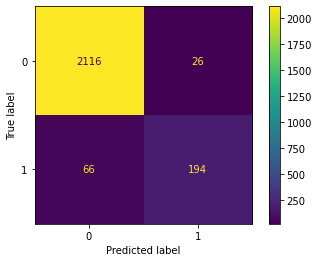

In [166]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.81      0.70      0.75       128

    accuracy                           0.95      1184
   macro avg       0.89      0.84      0.86      1184
weighted avg       0.95      0.95      0.95      1184
 



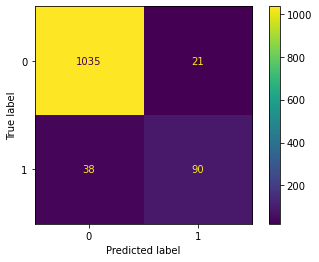

In [167]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

We can select other parameters to perform GridSearchCV and try optimize the desired parameter.

We see not good recall score for both train and test

Since only 11% of the total data had defaults, we will now try to balance the data before fiting the model.

In [170]:
### Imblearn over_sampling

In [171]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [172]:
selector_smote = selector.fit(X_res, y_res)

In [173]:
selector_smote.n_features_

21

In [174]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2142
           1       0.93      0.94      0.94      2142

    accuracy                           0.94      4284
   macro avg       0.94      0.94      0.94      4284
weighted avg       0.94      0.94      0.94      4284
 



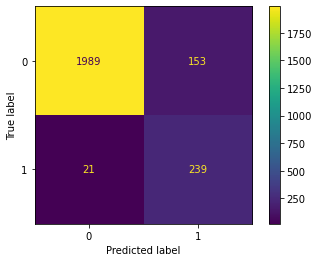

In [176]:
plot_confusion_matrix(selector_smote,X_train,y_train)
print(classification_report(y_res, pred_train_smote),'\n');

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1056
           1       0.61      0.92      0.73       128

    accuracy                           0.93      1184
   macro avg       0.80      0.92      0.84      1184
weighted avg       0.95      0.93      0.93      1184
 



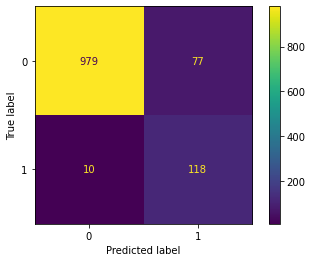

In [177]:
plot_confusion_matrix(selector_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

We are able to achieve a descent recall value without overfitting. Considering the opportunities such as
outliers, missing values and correlated features this is a fairly good model. 

It can be improved if we get better quality data where the features explaining the default are not missing to this extent. 

Of course we can try other techniques which are not sensitive towards missing values and outliers.

In [179]:
#THE END 

In [180]:
## Submitted by Sharjil_Shah, Great Learning, PGP -DSBA Jan21'A.

In [ ]:
#Thank You